# Comparing Quadrature Rules with Semilogy Plots

In [1]:
import numpy as np
from numpy.polynomial.legendre import leggauss
import matplotlib.pyplot as plt
eps = np.finfo(float).eps

In [2]:
def mysimp(func,N,a,b):
    x = np.linspace(a,b,N)
    # Insert Code here with new argument list
    h=(x[-1] - x[0])/(len(x)-1)
    w = np.ones(len(x))
    w[1::2] = 4
    w[2:-1:2] = 2
    w = w*h/3
    return w.dot(func(x)) # How would you implement the quadrature rule?

In [3]:
def mytrap(func,N,a,b):
    x = np.linspace(a,b,N)
    # Insert Code here with new argument list
    h=(x[-1] - x[0])/(len(x)-1)
    w = np.ones(len(x))
    w[0], w[-1] = w[0]/2, w[-1]/2
    w = w*h
    return w.dot(func(x))# How would you implement the quadrature rule?

In [4]:
def mymid(func,N,a,b):
    x = np.linspace(a,b,N)
    # Insert Code here with new argument list
    # Be careful, we need to define midpoints!
    h=(x[-1] - x[0])/(len(x)-1)
    c = (x[:-1] + x[1:])/2
    w = np.ones(len(c))
    w = w*h
    return w.dot(func(c))# How would you implement the quadrature rule (with midpoints)?

In [5]:
def f(x):
    return x**22

### Semilogy Error Plot Comparing Quadrature Rules

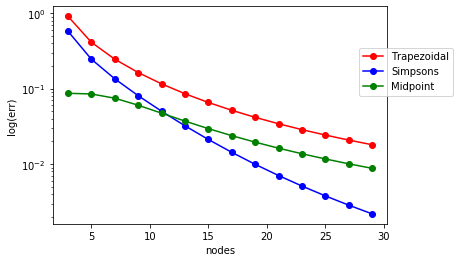

In [6]:
# ******************************************************************************
test = 2/23 #<-- Change the test solution each time you change the exponent above
# ******************************************************************************
errt = [] # Trapezoidal rule error array
errs = [] # Simpson's rule error array
errm = [] # Midpoint rule error array
a,b = -1, 1;
Nvec = np.arange(3,30,2) # Requires odd number of nodes (even number of subintervals)
# Construct a vector of errors and display them for the increasing grid-sizes
for N in Nvec:
    x = np.linspace(a,b,N)
    Itrap = mytrap(f,N,a,b)
    Isimp = mysimp(f,N,a,b)
    Imid = mymid(f,N,a,b)
    errt.append(np.fabs(Itrap-test))
    errs.append(np.fabs(Isimp-test))
    errm.append(np.fabs(Imid-test))
plt.semilogy(Nvec,errt,'ro-',Nvec,errs,'bo-',Nvec,errm,'go-')
plt.legend(['Trapezoidal','Simpsons','Midpoint'],loc='center left',bbox_to_anchor=(0.9,0.7))
plt.xlabel('nodes')
plt.ylabel('log(err)');
# "Something wrong with Simpson's rule? You may need to adjust Nvec so the number of nodes is odd."

### Gaussian Quadrature Nodes and Weights

###### There is a NumPy function that produces the nodes and weights for Gaussian quadrature -- the nodes are the zeros of Legendre polynomials. Examples are provided for you to peruse.

In [7]:
x = np.array([-np.sqrt(3)/3,np.sqrt(3)/3])
w = np.ones(2)
print('nodes = {}'.format(x))
print('weights = {}'.format(w))

nodes = [-0.57735027  0.57735027]
weights = [1. 1.]


In [8]:
N = 2
x,w = leggauss(N) # Using the NumPy package
print('nodes = {}'.format(x))
print('weights = {}'.format(w))

nodes = [-0.57735027  0.57735027]
weights = [1. 1.]


In [9]:
x = np.array([-np.sqrt(3/5),0,np.sqrt(3/5)])
w = np.array([5/9,8/9,5/9])
print('nodes = {}'.format(x))
print('weights = {}'.format(w))

nodes = [-0.77459667  0.          0.77459667]
weights = [0.55555556 0.88888889 0.55555556]


In [10]:
N = 3
x,w = leggauss(N) # Using the NumPy package
print('nodes = {}'.format(x))
print('weights = {}'.format(w))

nodes = [-0.77459667  0.          0.77459667]
weights = [0.55555556 0.88888889 0.55555556]


In [11]:
x = np.array([-np.sqrt((5+2*np.sqrt(10/7))/9),-np.sqrt((5-2*np.sqrt(10/7))/9),0,np.sqrt((5-2*np.sqrt(10/7))/9),np.sqrt((5+2*np.sqrt(10/7))/9)])
w = np.array([0.3*((0.7+5*np.sqrt(0.7))/(2+5*np.sqrt(0.7))),0.3*((-0.7+5*np.sqrt(0.7))/(-2+5*np.sqrt(0.7))),128/225,0.3*((-0.7+5*np.sqrt(0.7))/(-2+5*np.sqrt(0.7))),0.3*((0.7+5*np.sqrt(0.7))/(2+5*np.sqrt(0.7)))])
print('nodes = {}'.format(x))
print('weights = {}'.format(w))

nodes = [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
weights = [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


In [36]:
N = 5
x,w = leggauss(N) # Using the NumPy package
print('nodes = {}'.format(x))
print('weights = {}'.format(w))

nodes = [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
weights = [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]


###### Here is a plot of the node-spacing

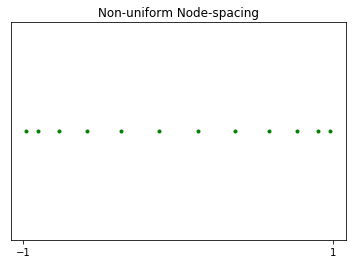

In [13]:
x, w = leggauss(12)
plt.plot(x,x*0,'g.')
plt.title('Non-uniform Node-spacing')
plt.xticks([-1,1])
plt.yticks([]);

### Using the Gaussian Quadrature nodes and weights to approximate an integral

###### Gaussian Quadrature requires only two lines (without a transformation)
* x, w = leggauss(N)
* Gn = w.dot(f(x))

There is one caveat that the nodes are contained in $[-1,1]$ so if the integration interval is $[a,b]$, more generally, then the transformation $$t(x) = \frac2{b-a}\left(x - \frac{a+b}2\right)$$ is required.
* Note that $t(a) = -1$ and $t(b) = 1$ so we want the transformation "to go the other way"
* Note that we want $x(-1) = a$ and $x(1) = b$
* Do not forget to re-size the weights $dx = \frac{b-a}2 dt$

$$\int_a^bf(x)\,dx = \int_{-1}^1f(t(x))\,\frac{b-a}2dt = \frac{b-a}2\int_{-1}^1f(t)\,dt$$

In [25]:
g = lambda x: x**22 # Example of a Python lambda function definition
N = 12
x, w = leggauss(N)
Igauss = w.dot(g(x))# How would you implement the Gaussian quadrature rule?
#print(test)
#print(Igauss)
#print (2/23)
print('Error |I(x**m) - In(x**m)| = {:2.4e}'.format(np.fabs(Igauss-test)))

Error |I(x**m) - In(x**m)| = 3.0531e-16


In [15]:
def mygauss(func,N,a=-1,b=1):
    x, w = leggauss(N)
    x, w = 2*(x-(a+b)/2)/(b-a), (b-a)*w/2 # Transform the nodes and weights
    return w.dot(func(x)) # How would you implement the Gaussian quadrature rule?

### Semilogy Error Plot Comparing Quadrature Rules

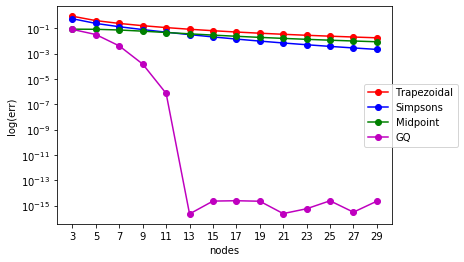

In [16]:
# ******************************************************************************
f = lambda x: x**22
test = 2/23 #<-- Change the test solution each time you change the exponent above
# ******************************************************************************
errt = [] # Trapezoidal rule error array
errs = [] # Simpson's rule error array
errm = []
errg = []
a,b = -1, 1;
Nvec = np.arange(3,30,2) # Requires odd number of nodes (even number of subintervals)
# Construct a vector of errors and display them for the increasing grid-sizes
for N in Nvec:
    x = np.linspace(a,b,N)
    Itrap = mytrap(f,N,a,b)
    Isimp = mysimp(f,N,a,b)
    Imid = mymid(f,N,a,b)
    Igauss = mygauss(f,N,a,b)
    errt.append(np.fabs(Itrap-test))
    errs.append(np.fabs(Isimp-test))
    errm.append(np.fabs(Imid-test))
    errg.append(np.fabs(Igauss-test)+eps) # Epsilon hack so log(0) does not occur
plt.semilogy(Nvec,errt,'ro-',Nvec,errs,'bo-',Nvec,errm,'go-',Nvec,errg,'mo-')
plt.legend(['Trapezoidal','Simpsons','Midpoint','GQ'],loc='center left',bbox_to_anchor=(0.9,0.5))
plt.xticks(Nvec)
plt.xlabel('nodes')
plt.ylabel('log(err)');

# Gaussian Quadrature Rule Versus Trapezoidal Rule

###### How many nodes are required to estimate $\int_{-1}^1e^{3x}\,dx$ to within an error of $E = 10^{-4}$ using the trapezoidal rule?

In [17]:
exact = (np.exp(3)-np.exp(-3))/3
maxnodes = np.sqrt(6*np.exp(3))*1e2+1 # Trapezoidal estimate
print('The estimated number of nodes required {}'.format(maxnodes))
print('The number of nodes required as an int {}'.format(int(np.ceil(maxnodes))))

The estimated number of nodes required 1098.7851408136567
The number of nodes required as an int 1099


###### Test trapezoidal rule (N = 1099) on $\int_{-1}^1e^{3x}\,dx$

In [18]:
Nmax = int(np.ceil(maxnodes))
N = Nmax # Worst-case scenario
#N = 635 # Actual number of nodes required
x = np.linspace(-1,1,N)
h = lambda x: np.exp(3*x)
Itrap = mytrap(h,N,-1,1)
print('Trapezoidal rule yields {}'.format(Itrap))
print('Exact value is {}'.format(exact))
print('Absolute error is {}'.format(np.fabs(Itrap-exact)))

Trapezoidal rule yields 6.678599903779855
Exact value is 6.678583284939935
Absolute error is 1.6618839919324557e-05


In [19]:
N = 5
x,w = leggauss(N)
Igauss = np.dot(h(x),w)
print('Gaussian rule yields {}'.format(Igauss))
print('Exact value is {}'.format(exact))
print('Absolute error is {}'.format(np.fabs(Igauss-exact)))

Gaussian rule yields 6.678525906128526
Exact value is 6.678583284939935
Absolute error is 5.7378811409769526e-05


### Takeaway: 
* <font color = blue> Obtaining the nodes and weights for the trapezoidal rule is simple
* <font color = blue> Obtaining the nodes and weights for GQ takes more work
* <font color = blue> GQ requires significantly less nodes and weights however
* <font color = blue> GQ with 5 nodes attained (roughly) $10^{-4}$ accuracy versus 635 nodes for the trapezoidal rule
* <font color = blue> If you get to choose the nodes, generally choose GQ nodes and weights for superior performance
* <font color = blue> Work smarter, not harder ... the analysis part of numerical analysis is awesome!

### <font color = 'red'>What is the degree of precision for Gaussian Quadrature?

--[back to top](#Comparing-Quadrature-Rules-with-Semilogy-Plots)